In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialising graph options for plotting
plt.style.use("ggplot")
plt.rcParams.update({'font.size': 20})

# Option to make the plotting to be interactive
pd.options.plotting.backend = "plotly"

## Getting data from CSV file - Oxford Database 2020 & 2021 - USA by state

* Number of Confirmed Cases
* Number of Deaths
* Number of Vaccinated population
* Government Response Index
* 2020 Database coverage: 01/01/2020 to 31/12/2020
* 2021 Database coverage: 01/01/2021 to 31/12/2021
* The last date of 2020 Oxfort database: 2020-12-31
* The last date of 2021 Oxfort database: 2021-12-31

In [3]:
# Creating the DataFrame from the CSV file - 2020 data per US state (confirmed cases and deaths)
state_data_df = pd.read_csv("./Resources/usa_county_wise.csv")
state_data_df

# Creating the DataFrame from the CSV files - 2020 Oxford Database & 2021 Oxford Database - USA by state
oxford_data_master_2020_df = pd.read_csv("./Resources/oxford_data_2020.csv")
oxford_data_master_2021_df = pd.read_csv("./Resources/oxford_data_2021.csv")

# Fixing the Date Format to Date type
oxford_data_master_2020_df['Date'] = pd.to_datetime(oxford_data_master_2020_df['Date'], format='%Y%m%d', errors='coerce')
oxford_data_master_2020_df['Date'] = [d.date() for d in oxford_data_master_2020_df["Date"]]
oxford_data_master_2020_df['Date'] = pd.to_datetime(oxford_data_master_2020_df['Date'])  
oxford_data_master_2021_df['Date'] = pd.to_datetime(oxford_data_master_2021_df['Date'], format='%Y%m%d', errors='coerce')
oxford_data_master_2021_df['Date'] = [d.date() for d in oxford_data_master_2021_df["Date"]]
oxford_data_master_2021_df['Date'] = pd.to_datetime(oxford_data_master_2021_df['Date'])  

# Creating the Data Frames for the National data for 2020 and 2021
national_data_2020_df = oxford_data_master_2020_df.loc[oxford_data_master_2020_df["RegionName"].isna(),:].copy()
national_data_2021_df = oxford_data_master_2021_df.loc[oxford_data_master_2021_df["RegionName"].isna(),:].copy()

# Creating the Data Frames for the differnt States for 2020 and 2021
state_data_2020_df = oxford_data_master_2020_df.loc[oxford_data_master_2020_df["Date"] == oxford_data_master_2020_df["Date"].max(),:].copy()
state_data_2021_df = oxford_data_master_2021_df.loc[oxford_data_master_2021_df["Date"] == oxford_data_master_2021_df["Date"].max(),:].copy()

print (f"The last date of 2020 Oxfort database: {oxford_data_master_2020_df['Date'].max()}.")
print (f"The last date of 2021 Oxfort database: {oxford_data_master_2021_df['Date'].max()}.")

C:\Users\giova\AppData\Local\Temp\ipykernel_4948\3217858256.py:6: DtypeWarning: Columns (82,93,121,122,130) have mixed types. Specify dtype option on import or set low_memory=False.
  oxford_data_master_2020_df = pd.read_csv("./Resources/oxford_data_2020.csv")
C:\Users\giova\AppData\Local\Temp\ipykernel_4948\3217858256.py:7: DtypeWarning: Columns (82) have mixed types. Specify dtype option on import or set low_memory=False.
  oxford_data_master_2021_df = pd.read_csv("./Resources/oxford_data_2021.csv")


The last date of 2020 Oxfort database: 2020-12-31 00:00:00.
The last date of 2021 Oxfort database: 2021-12-31 00:00:00.


In [4]:
# Cleaning the Data

## 2020
# Removing the national information (RegionName is empty), and Washington DC
state_data_2020_df = state_data_2020_df.loc[state_data_2020_df["RegionName"] != "Washington DC",:]
state_data_2020_df = state_data_2020_df.dropna(subset=["RegionName"])
# Keeping only the Required Columns on the State Data Frames
state_data_2020_df = state_data_2020_df[["RegionName", "ConfirmedCases", "ConfirmedDeaths"]]

## 2021
# Removing the national information (RegionName is empty), and Washington DC
state_data_2021_df = state_data_2021_df.loc[state_data_2021_df["RegionName"] != "Washington DC",:]
state_data_2021_df = state_data_2021_df.dropna(subset=["RegionName"])
# Keeping only the Required Columns on the State Data Frames
state_data_2021_df = state_data_2021_df[["RegionName", "ConfirmedCases", "ConfirmedDeaths"]]

In [5]:
state_data_2020_df

RegionName  ConfirmedCases  ConfirmedDeaths
731            Alaska         47014.0            206.0
1097          Alabama        361226.0           4827.0
1463         Arkansas        225138.0           3676.0
1829          Arizona        520207.0           8864.0
2195       California       2384691.0          25848.0
2561         Colorado        361021.0           5420.0
2927      Connecticut        185708.0           5995.0
3659         Delaware         57456.0           1061.0
4025          Florida       1323315.0          21673.0
4391          Georgia        666452.0          10934.0
4757           Hawaii         22007.0            288.0
5123             Iowa        281712.0           3891.0
5489            Idaho        141077.0           1436.0
5855         Illinois        963389.0          17978.0
6221          Indiana        511485.0           9390.0
6587           Kansas        225212.0           2755.0
6953         Kentucky        265261.0           2623.0
7319        Louisiana        315275.0           7488.0
7685    Massachusetts        375178.0          10522.0
8051         Maryland        276662.0           5895.0
8417            Maine         24201.0            347.0
8783         Michigan        528621.0          13018.0
9149        Minnesota        415302.0           5382.0
9515         Missouri        440756.0           5724.0
9881      Mississippi        215811.0           4787.0
10247         Montana         81555.0            961.0
10613  North Carolina        539545.0           6748.0
10979    North Dakota         92090.0           1299.0
11345        Nebraska        166798.0           1651.0
11711   New Hampshire         44882.0            759.0
12077      New Jersey        529027.0          19042.0
12443      New Mexico        142864.0           2477.0
12809          Nevada        224731.0           3122.0
13175        New York        978783.0          37799.0
13541            Ohio        700380.0          13621.0
13907        Oklahoma        291209.0           2489.0
14273          Oregon        113909.0           1477.0
14639    Pennsylvania        648574.0          16030.0
15005    Rhode Island         87949.0           1930.0
15371  South Carolina        307507.0           5296.0
15737    South Dakota         99164.0           1488.0
16103       Tennessee        585505.0           6907.0
16469           Texas       1807560.0          28066.0
16835            Utah        276612.0           1269.0
17201        Virginia        349584.0           5032.0
17567         Vermont          7412.0            136.0
17933      Washington        246752.0           3461.0
18299       Wisconsin        520438.0           5242.0
18665   West Virginia         85334.0           1338.0
19031         Wyoming         44409.0            438.0

## Getting data from Census API

* Check the population for each state via Census API call
* Calculate Deaths per capita
* Calculate Cases per capita
* Identify the correlatoin between Confirmed Cases and Deaths

In [6]:
# Importing dependencies
import requests
from census import Census

# Census API Key
from api_keys import (census_api_key)
c = Census(census_api_key, year=2020)

census_data = c.acs5.get(("NAME", "B01003_001E", "B19301_001E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Renaming and Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "NAME": "RegionName",
                                      "state": "State"})

census_pd = census_pd[["RegionName", "Population"]]

# Calculating the total population of USA based on the data extracted from Census API
usa_population = census_pd['Population'].sum()

# Merging the Statistic DataFrame and Census DataFrame
merged_2020_df = pd.merge(state_data_2020_df, census_pd, on="RegionName", how="left")
merged_2021_df = pd.merge(state_data_2021_df, census_pd, on="RegionName", how="left")

# Calculating "Deaths Per Case" and "Cases Per Capita"
# 2020
merged_2020_df["Deaths Per Capita (%)"] = (merged_2020_df["ConfirmedDeaths"] / merged_2020_df["Population"]) * 100
merged_2020_df["Cases Per Capita (%)"] = (merged_2020_df["ConfirmedCases"] / merged_2020_df["Population"]) * 100
merged_2020_df["Deaths per Confirmed Cases (%)"] = (merged_2020_df["ConfirmedDeaths"] / merged_2020_df["ConfirmedCases"]) * 100

# 2021
merged_2021_df["Deaths Per Capita (%)"] = (merged_2021_df["ConfirmedDeaths"] / merged_2021_df["Population"]) * 100
merged_2021_df["Cases Per Capita (%)"] = (merged_2021_df["ConfirmedCases"] / merged_2021_df["Population"]) * 100
merged_2021_df["Deaths per Confirmed Cases (%)"] = (merged_2021_df["ConfirmedDeaths"] / merged_2021_df["ConfirmedCases"]) * 100

In [7]:
merged_2020_df.head()

RegionName  ConfirmedCases  ConfirmedDeaths  Population  \
0      Alaska         47014.0            206.0    736990.0   
1     Alabama        361226.0           4827.0   4893186.0   
2    Arkansas        225138.0           3676.0   3011873.0   
3     Arizona        520207.0           8864.0   7174064.0   
4  California       2384691.0          25848.0  39346023.0   

   Deaths Per Capita (%)  Cases Per Capita (%)  Deaths per Confirmed Cases (%)  
0               0.027952              6.379191                        0.438167  
1               0.098647              7.382225                        1.336283  
2               0.122050              7.475016                        1.632776  
3               0.123556              7.251218                        1.703937  
4               0.065694              6.060818                        1.083914

## Plot 1 - 2020 :: Deaths Per Capita (%) / State

National average of deaths per capita in 2020: 0.10191018489756098.


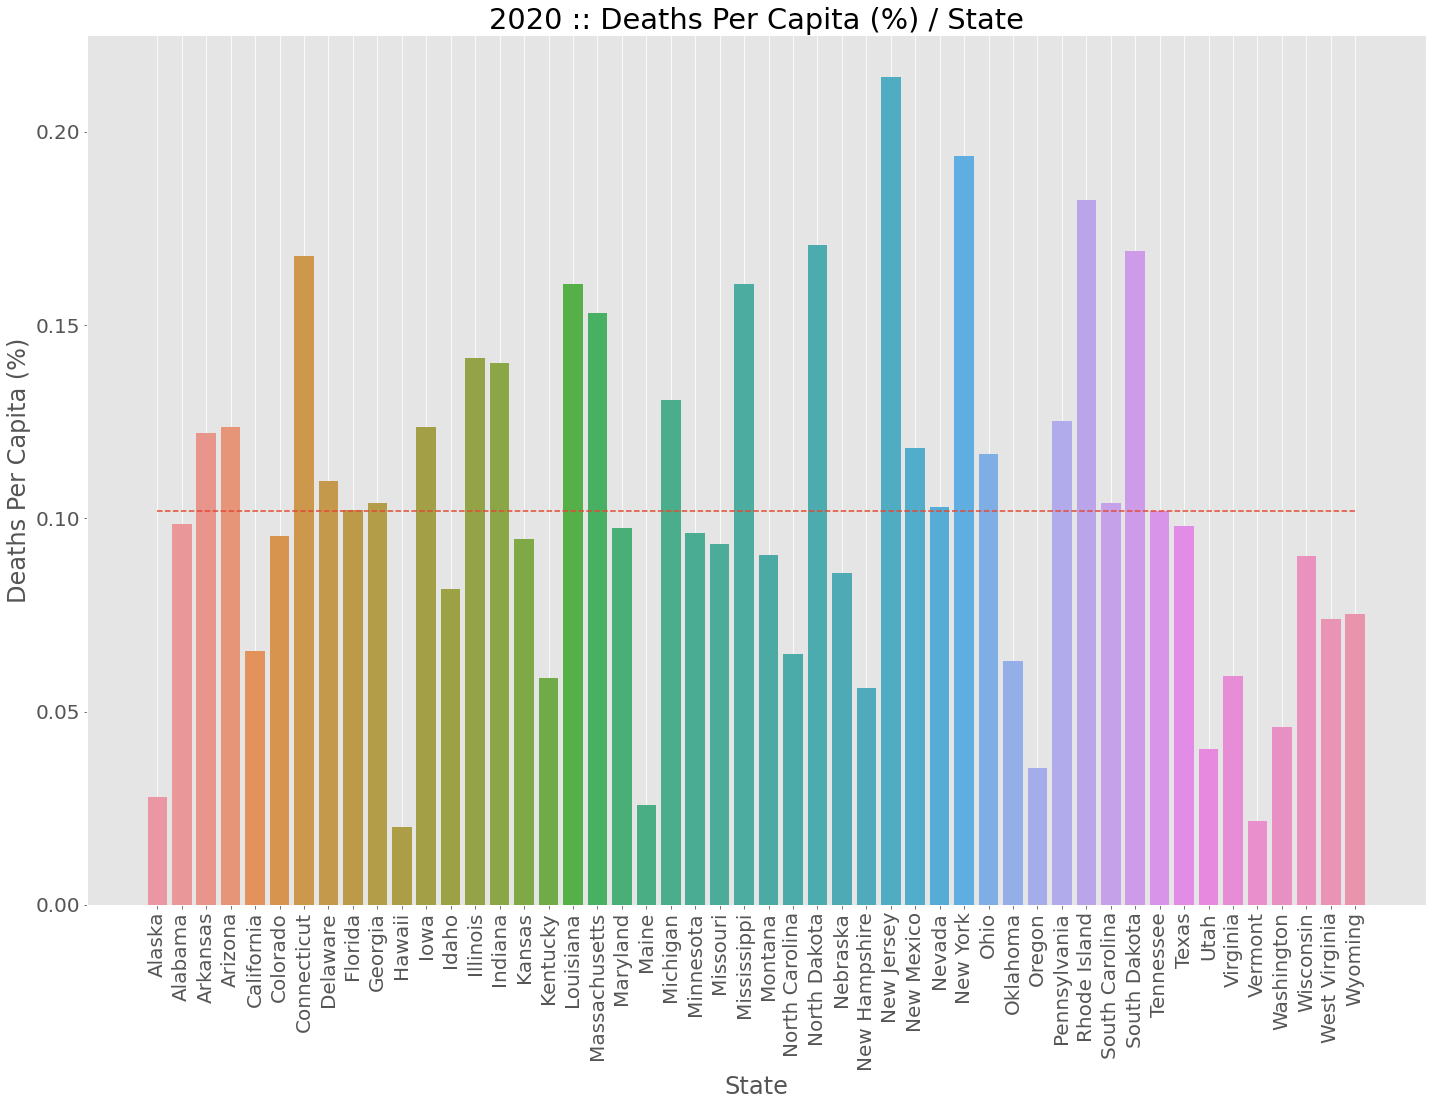

In [8]:
plt.figure(figsize=(24,16))

mean_deaths_per_capita = merged_2020_df["Deaths Per Capita (%)"].mean()
print (f"National average of deaths per capita in 2020: {mean_deaths_per_capita}.")

# Creating the plot using Matplotlib's pyplot methods
sns.barplot(x=merged_2020_df["RegionName"], y=merged_2020_df["Deaths Per Capita (%)"])
plt.title("2020 :: Deaths Per Capita (%) / State")
plt.xlabel("State")
plt.ylabel("Deaths Per Capita (%)")
plt.xticks(rotation="vertical")
plt.grid()
plt.plot(merged_2020_df["RegionName"], pd.Series(mean_deaths_per_capita, index=range(len(merged_2020_df))),linestyle="--")
plt.savefig(fname="./images/2020 - Deaths Per Capita.png")

## Plot 1 - Analysis
* This plot brings the impact and % of deths per capita for each State.
* As an example, in New Jersey, 175 deaths for each 10,000 people.
* More than 100 deths per group of 10k people in Connecticut, Massachusetts, New Jersey, New York and South Dakota
* National average of deaths per capita: 0.0338 %

## Plot 2 - 2020 :: Confirmed Cases Per Capita (%) / State

National average of confirmed cases per capita (%) in 2020: 6.407963348782099.


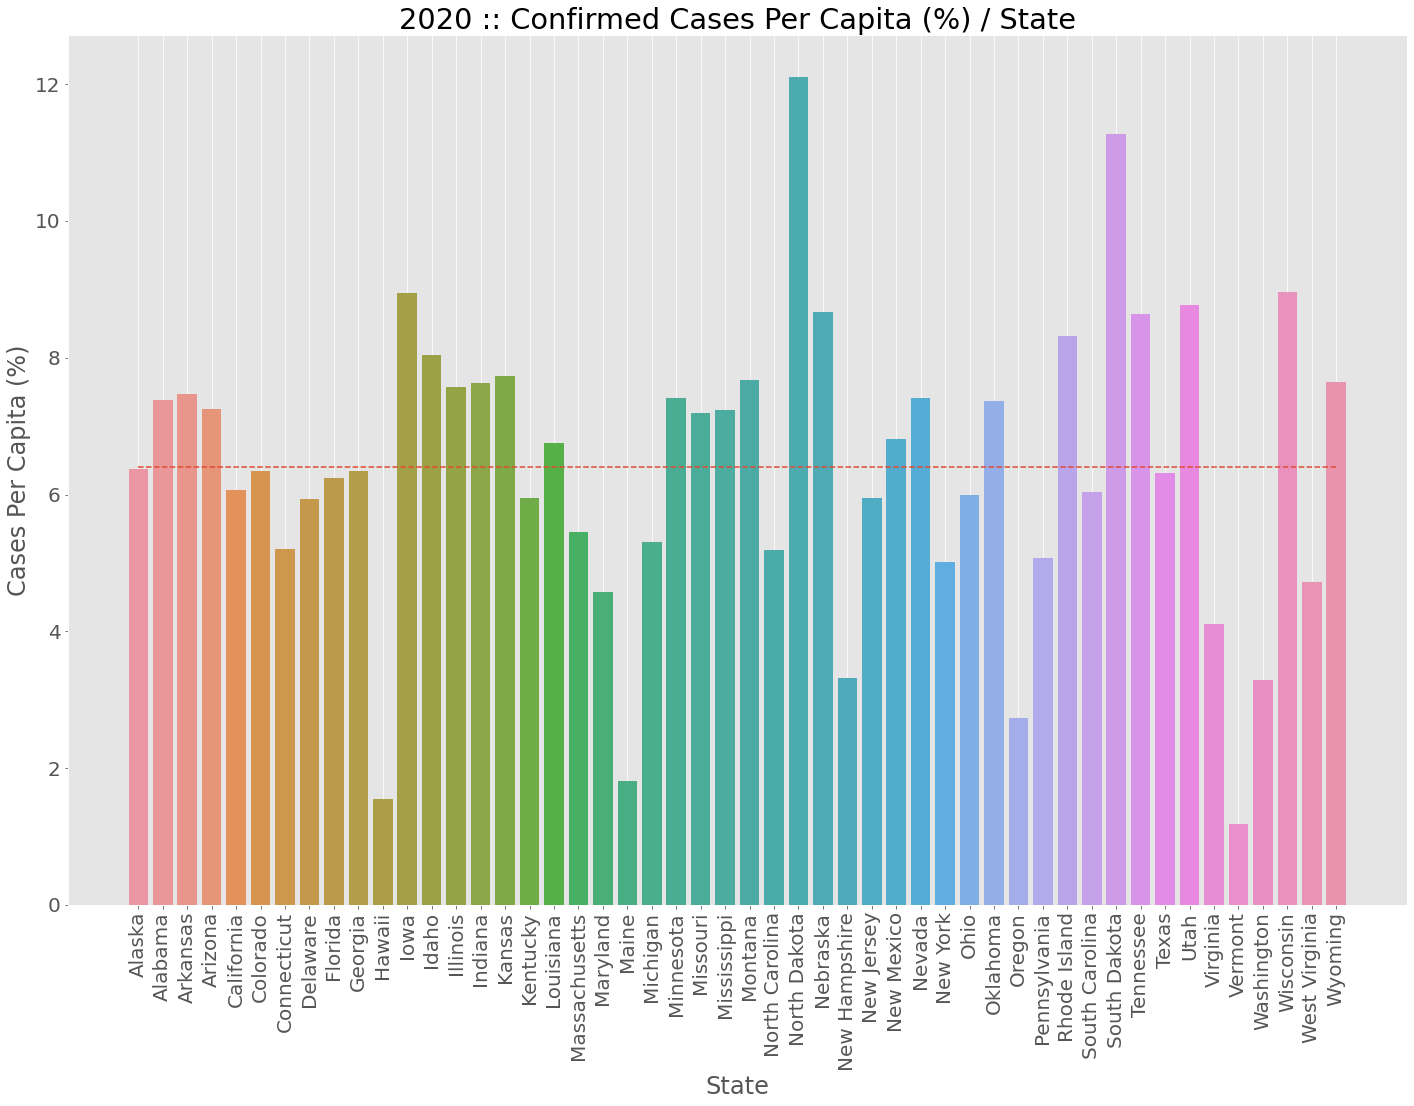

In [9]:
plt.figure(figsize=(24,16))

mean_cases_per_capita = merged_2020_df["Cases Per Capita (%)"].mean()
print (f"National average of confirmed cases per capita (%) in 2020: {mean_cases_per_capita}.")

# Creating the plot using Matplotlib's pyplot methods
sns.barplot(x=merged_2020_df["RegionName"], y=merged_2020_df["Cases Per Capita (%)"])
plt.title("2020 :: Confirmed Cases Per Capita (%) / State")
plt.xlabel("State")
plt.ylabel("Cases Per Capita (%)")
plt.xticks(rotation="vertical")
plt.grid()
plt.plot(merged_2020_df["RegionName"], pd.Series(mean_cases_per_capita, index=range(len(merged_2020_df))),linestyle="--")
plt.savefig(fname="./images/2020 - Confirmed Cases Per Capita.png")

## Plot 2 - Analysis
* This plot brings the impact and % of Per Confirmed Cases for each State.
* 48% of the states are above of the mean.
* 12 in 100 people were confimed covid in Noth Carolina



## Plot 3 - 2020 :: Deaths Per Confirmed Cases (%) / State

National average of deaths per confirmed cases (%) in 2020: 1.6442066084392093.


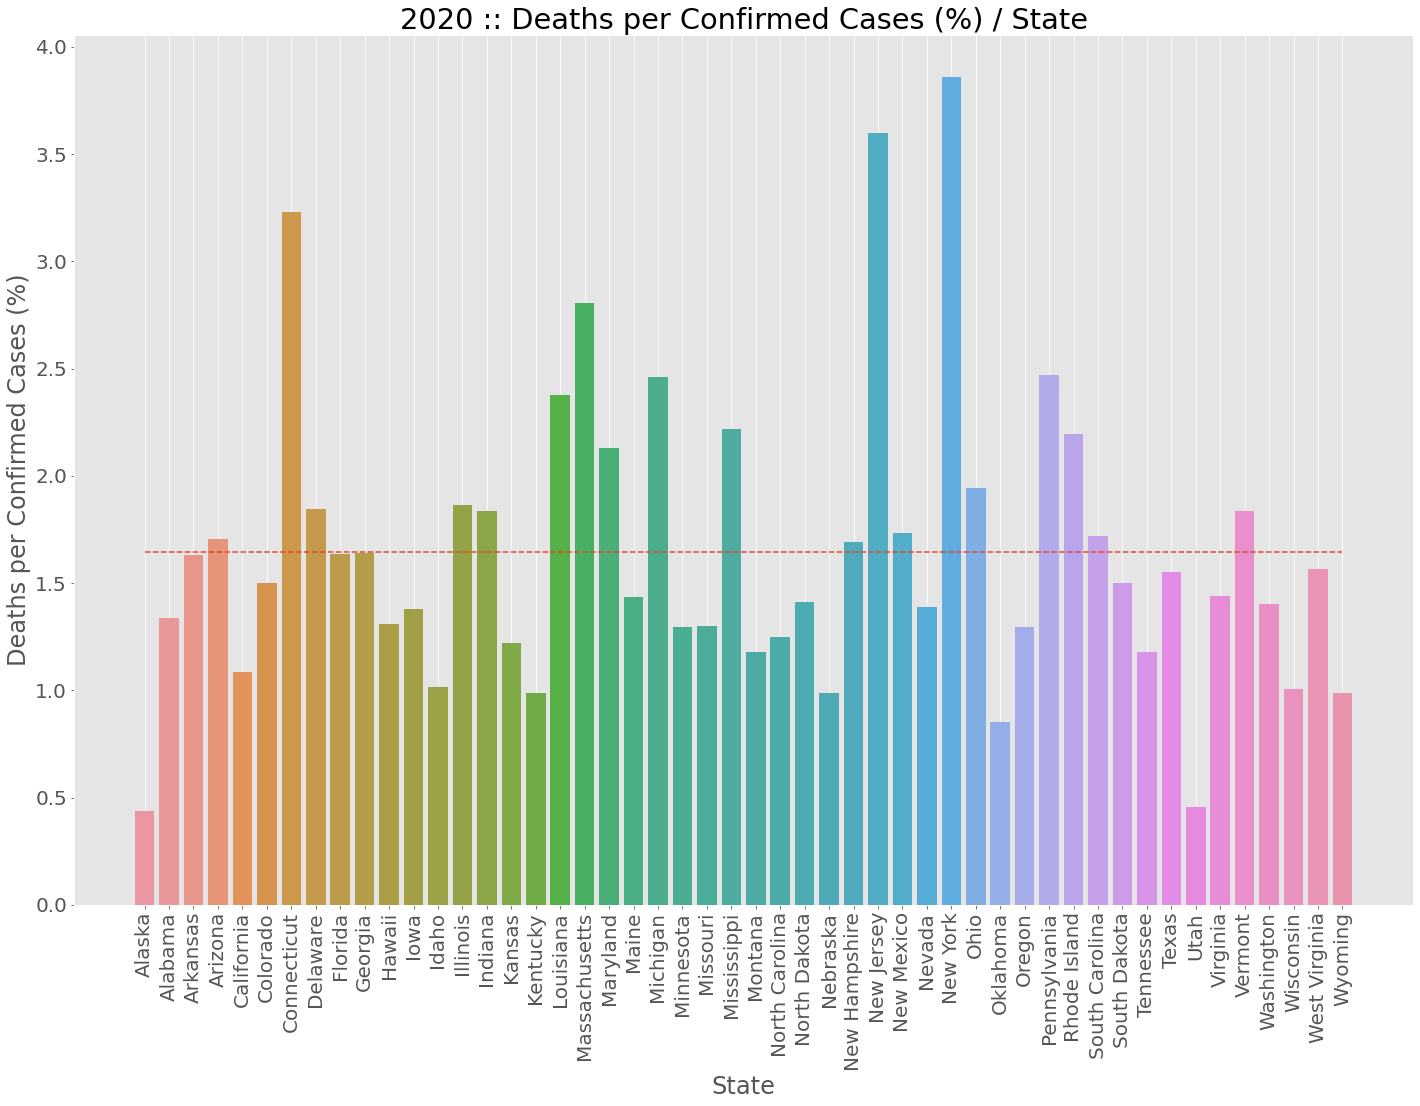

In [10]:
plt.figure(figsize=(24,16))

mean_deaths_per_cases = merged_2020_df["Deaths per Confirmed Cases (%)"].mean()
print (f"National average of deaths per confirmed cases (%) in 2020: {mean_deaths_per_cases}.")

# Creating the plot using Matplotlib's pyplot methods
sns.barplot(x=merged_2020_df["RegionName"], y=merged_2020_df["Deaths per Confirmed Cases (%)"])
plt.title("2020 :: Deaths per Confirmed Cases (%) / State")
plt.xlabel("State")
plt.ylabel("Deaths per Confirmed Cases (%)")
plt.xticks(rotation="vertical")
plt.grid()
plt.plot(merged_2020_df["RegionName"], pd.Series(mean_deaths_per_cases, index=range(len(merged_2020_df))),linestyle="--")
plt.savefig(fname="./images/2020 - Deaths Per Confirmed Cases.png")

## Plot 3 - Analysis
* This plot brings the impact and % of  Deaths Per Confirmed Cases for each State.
* 32% of the states are above of the mean.
* More than 3% of the people that had confirmed cases in Connecticut, New Jersey and New York, died

In [11]:
summary_2020_df = merged_2020_df[["RegionName", "ConfirmedCases", "ConfirmedDeaths"]]
summary_2020_df = summary_2020_df.set_index(["RegionName"])
summary_2020_df

ConfirmedCases  ConfirmedDeaths
RegionName                                     
Alaska                 47014.0            206.0
Alabama               361226.0           4827.0
Arkansas              225138.0           3676.0
Arizona               520207.0           8864.0
California           2384691.0          25848.0
Colorado              361021.0           5420.0
Connecticut           185708.0           5995.0
Delaware               57456.0           1061.0
Florida              1323315.0          21673.0
Georgia               666452.0          10934.0
Hawaii                 22007.0            288.0
Iowa                  281712.0           3891.0
Idaho                 141077.0           1436.0
Illinois              963389.0          17978.0
Indiana               511485.0           9390.0
Kansas                225212.0           2755.0
Kentucky              265261.0           2623.0
Louisiana             315275.0           7488.0
Massachusetts         375178.0          10522.0
Maryland              276662.0           5895.0
Maine                  24201.0            347.0
Michigan              528621.0          13018.0
Minnesota             415302.0           5382.0
Missouri              440756.0           5724.0
Mississippi           215811.0           4787.0
Montana                81555.0            961.0
North Carolina        539545.0           6748.0
North Dakota           92090.0           1299.0
Nebraska              166798.0           1651.0
New Hampshire          44882.0            759.0
New Jersey            529027.0          19042.0
New Mexico            142864.0           2477.0
Nevada                224731.0           3122.0
New York              978783.0          37799.0
Ohio                  700380.0          13621.0
Oklahoma              291209.0           2489.0
Oregon                113909.0           1477.0
Pennsylvania          648574.0          16030.0
Rhode Island           87949.0           1930.0
South Carolina        307507.0           5296.0
South Dakota           99164.0           1488.0
Tennessee             585505.0           6907.0
Texas                1807560.0          28066.0
Utah                  276612.0           1269.0
Virginia              349584.0           5032.0
Vermont                 7412.0            136.0
Washington            246752.0           3461.0
Wisconsin             520438.0           5242.0
West Virginia          85334.0           1338.0
Wyoming                44409.0            438.0

In [12]:
fig = summary_2020_df.plot.bar(title='Confirmed Cases and Deaths per State (2020)')
fig.update_layout(title_x=0.5)
# TO-DO: How to save this interactive file ?

## Plot 2021 :: Deaths Per Capita (%) / State

In [13]:
merged_2021_df

RegionName  ConfirmedCases  ConfirmedDeaths  Population  \
0           Alaska          157169              978    736990.0   
1          Alabama          896614            16455   4893186.0   
2         Arkansas          566486             9148   3011873.0   
3          Arizona         1381488            24229   7174064.0   
4       California         5517870            76478  39346023.0   
5         Colorado         1001343            10806   5684926.0   
6      Connecticut          510188             9160   3570549.0   
7         Delaware          180366             2286    967679.0   
8          Florida         4209927            62504  21216924.0   
9          Georgia         1839879            31443  10516579.0   
10          Hawaii          112932             1090   1420074.0   
11            Iowa          575501             7858   3150011.0   
12           Idaho          319382             4162   1754367.0   
13        Illinois         2149574            31017  12716164.0   
14         Indiana         1246854            19037   6696893.0   
15          Kansas          520388             7006   2912619.0   
16        Kentucky          856145            12118   4461952.0   
17       Louisiana          828695            14986   4664616.0   
18   Massachusetts         1140614            16706   6873003.0   
19        Maryland          720814            11758   6037624.0   
20           Maine          146736             1531   1340825.0   
21        Michigan         1710325            29020   9973907.0   
22       Minnesota         1022212            10656   5600166.0   
23        Missouri         1013458            16227   6124160.0   
24     Mississippi          543737            10450   2981835.0   
25         Montana          197724             2906   1061705.0   
26  North Carolina         1686667            19426  10386227.0   
27    North Dakota          174319             2057    760394.0   
28        Nebraska          338257             3338   1923826.0   
29   New Hampshire          198667             1961   1355244.0   
30      New Jersey         1564253            29037   8885418.0   
31      New Mexico          350043             5855   2097021.0   
32          Nevada          484641             8419   3030281.0   
33        New York         3480280            59508  19514849.0   
34            Ohio         2016082            31897  11675275.0   
35        Oklahoma          708938            12419   3949342.0   
36          Oregon          421263             5655   4176346.0   
37    Pennsylvania         2036424            36705  12794885.0   
38    Rhode Island          231096             3066   1057798.0   
39  South Carolina          975320            14636   5091517.0   
40    South Dakota          179204             2486    879336.0   
41       Tennessee         1436263            20762   6772268.0   
42           Texas         4630880            75744  28635442.0   
43            Utah          636992             3787   3151239.0   
44        Virginia         1118518            15587   8509358.0   
45         Vermont           64447              471    624340.0   
46      Washington          849075             9853   7512465.0   
47       Wisconsin         1120663            11173   5806975.0   
48   West Virginia          328162             5336   1807426.0   
49         Wyoming          115638             1526    581348.0   

    Deaths Per Capita (%)  Cases Per Capita (%)  \
0                0.132702             21.325798   
1                0.336284             18.323726   
2                0.303731             18.808429   
3                0.337730             19.256700   
4                0.194373             14.023959   
5                0.190082             17.614002   
6                0.256543             14.288783   
7                0.236235             18.639032   
8                0.294595             19.842306   
9                0.298985             17.495033   
10               0.076757    

National average of deaths per capita in 2021: 0.24188594208530373.
There are 31 States above the National average of National average of Deaths Per Capita in 2021.


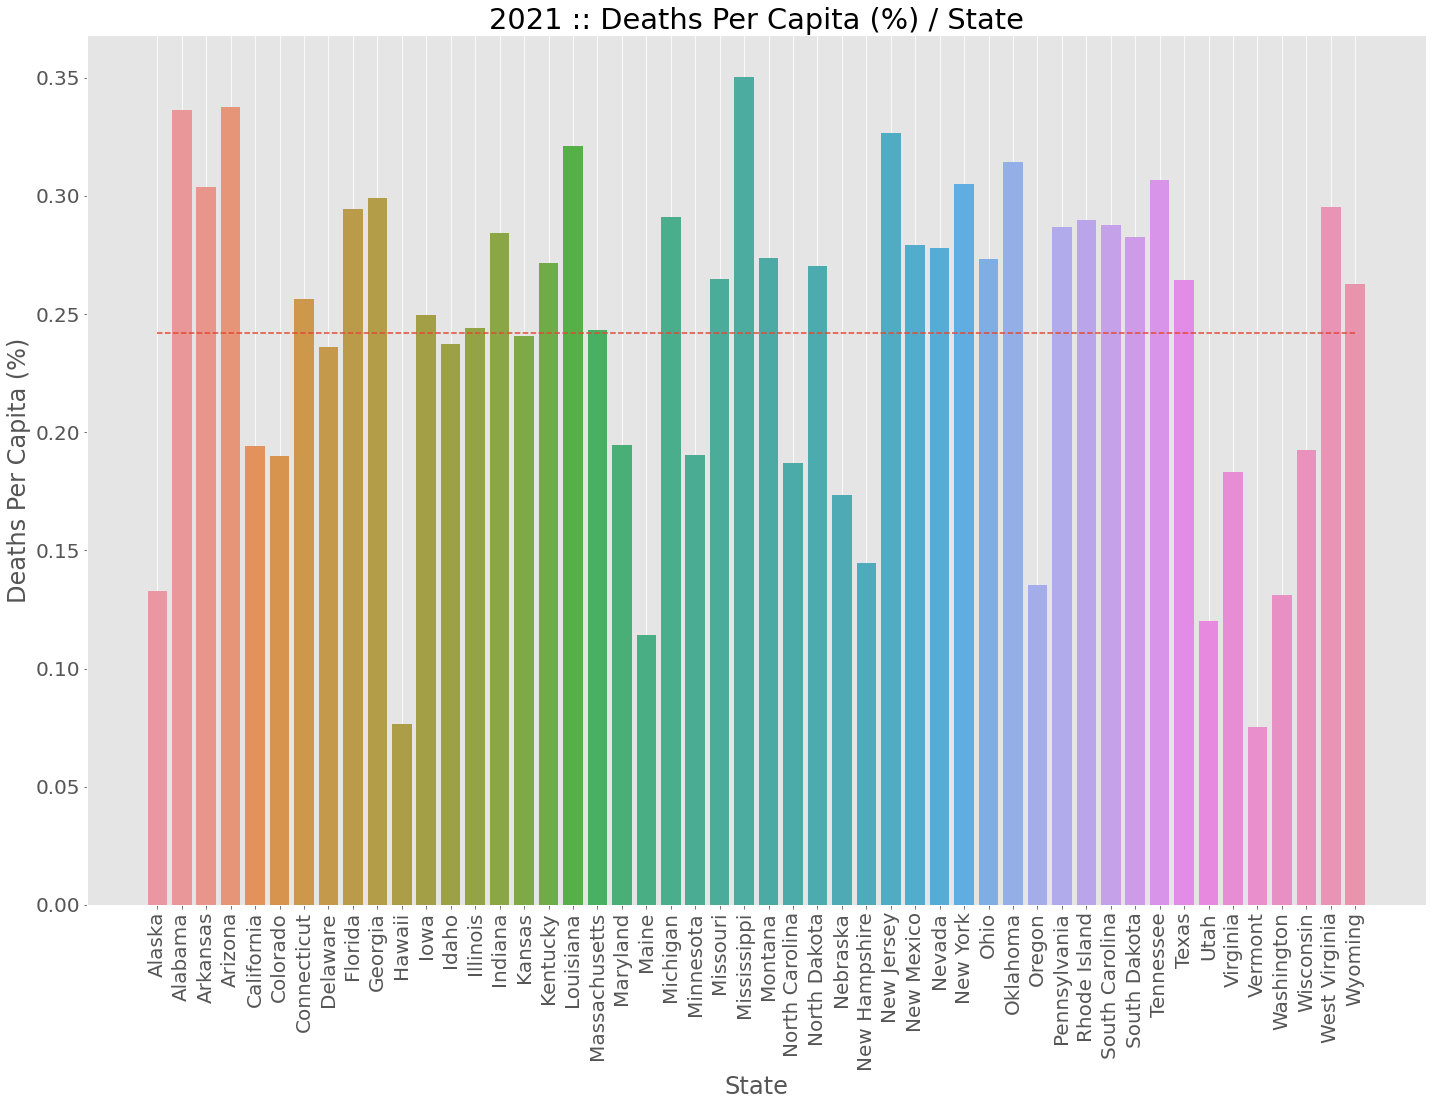

In [14]:
plt.figure(figsize=(24,16))

mean_deaths_per_capita = merged_2021_df["Deaths Per Capita (%)"].mean()
print (f"National average of deaths per capita in 2021: {mean_deaths_per_capita}.")
number_states_over_average = merged_2021_df.loc[merged_2021_df["Deaths Per Capita (%)"] > mean_deaths_per_capita]["Deaths Per Capita (%)"].count()
print (f"There are {number_states_over_average} States above the National average of National average of Deaths Per Capita in 2021.")

# Creating the plot using Matplotlib's pyplot methods
sns.barplot(x=merged_2021_df["RegionName"], y=merged_2021_df["Deaths Per Capita (%)"])
plt.title("2021 :: Deaths Per Capita (%) / State")
plt.xlabel("State")
plt.ylabel("Deaths Per Capita (%)")
plt.xticks(rotation="vertical")
plt.grid()
plt.plot(merged_2021_df["RegionName"], pd.Series(mean_deaths_per_capita, index=range(len(merged_2021_df))),linestyle="--")
plt.savefig(fname="./images/2021 - Deaths Per Capita.png")

## Plot 2021 :: Confirmed Cases Per Capita (%) / State

National average of confirmed cases per capita (%) in 2021: 17.090339300304148.
There are 31 States above the National average of National average of Cases Per Capita in 2021.


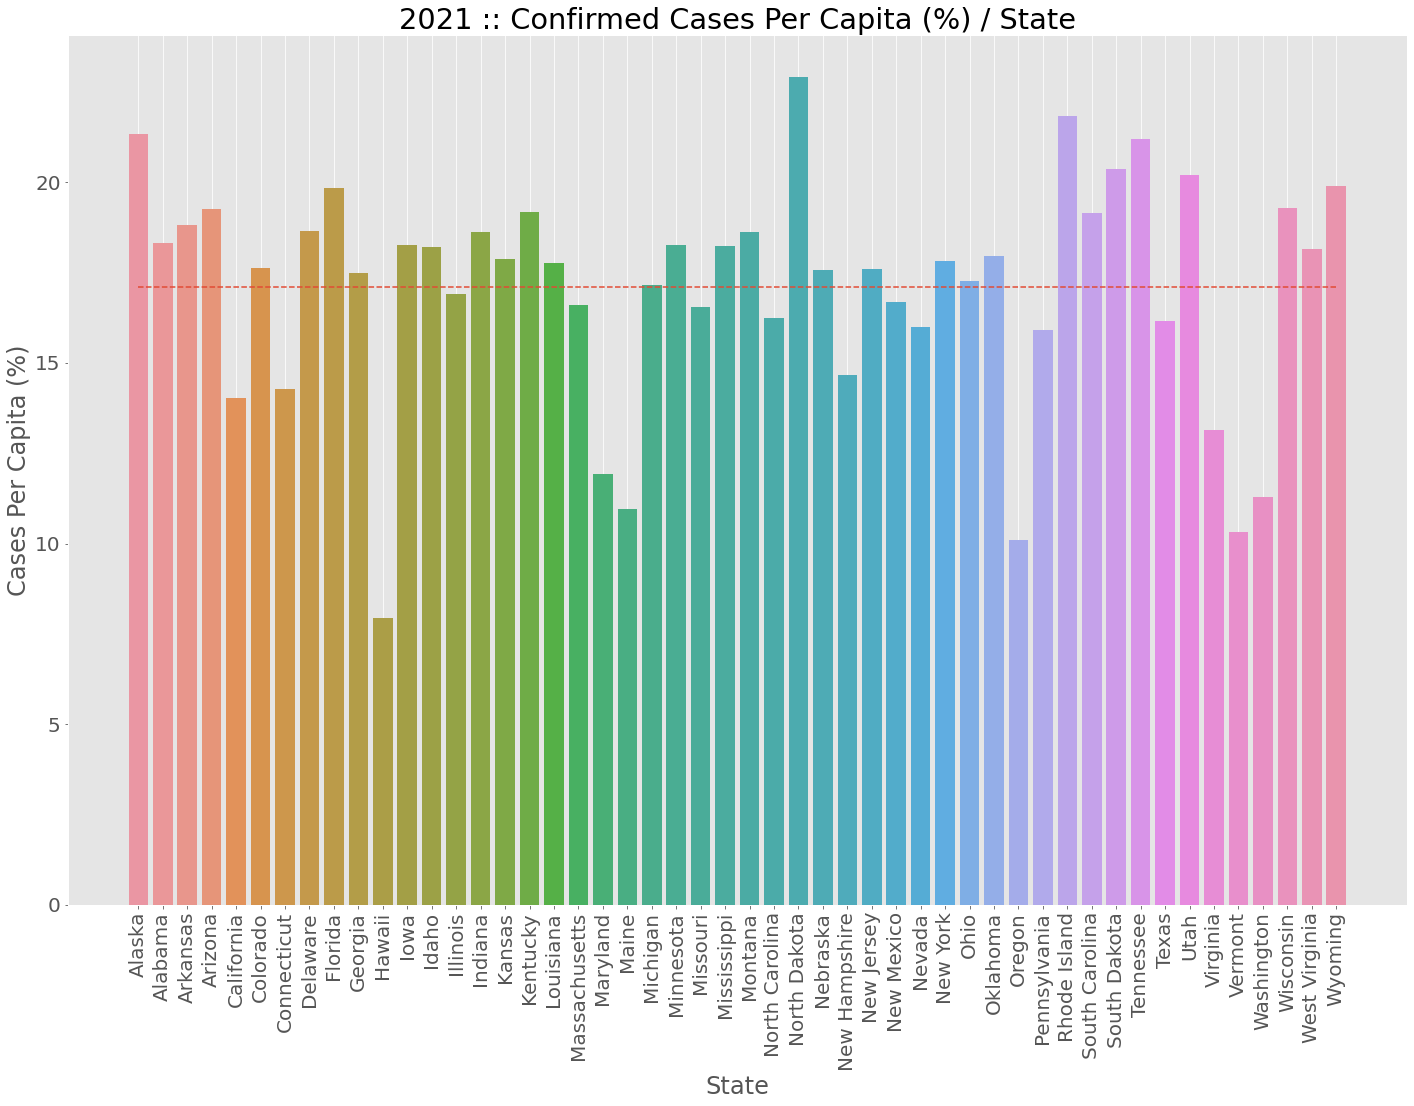

In [15]:
plt.figure(figsize=(24,16))

mean_cases_per_capita = merged_2021_df["Cases Per Capita (%)"].mean()
print (f"National average of confirmed cases per capita (%) in 2021: {mean_cases_per_capita}.")
number_states_over_average = merged_2021_df.loc[merged_2021_df["Deaths Per Capita (%)"] > mean_deaths_per_capita]["Deaths Per Capita (%)"].count()
print (f"There are {number_states_over_average} States above the National average of National average of Cases Per Capita in 2021.")

# Creating the plot using Matplotlib's pyplot methods
sns.barplot(x=merged_2021_df["RegionName"], y=merged_2021_df["Cases Per Capita (%)"])
plt.title("2021 :: Confirmed Cases Per Capita (%) / State")
plt.xlabel("State")
plt.ylabel("Cases Per Capita (%)")
plt.xticks(rotation="vertical")
plt.grid()
plt.plot(merged_2021_df["RegionName"], pd.Series(mean_cases_per_capita, index=range(len(merged_2021_df))),linestyle="--")
plt.savefig(fname="./images/2021 - Confirmed Cases Per Capita.png")

## Plot - 2021 :: Deaths Per Confirmed Cases (%) / State

National average of deaths per confirmed cases (%) in 2021: 1.5055607507949598.


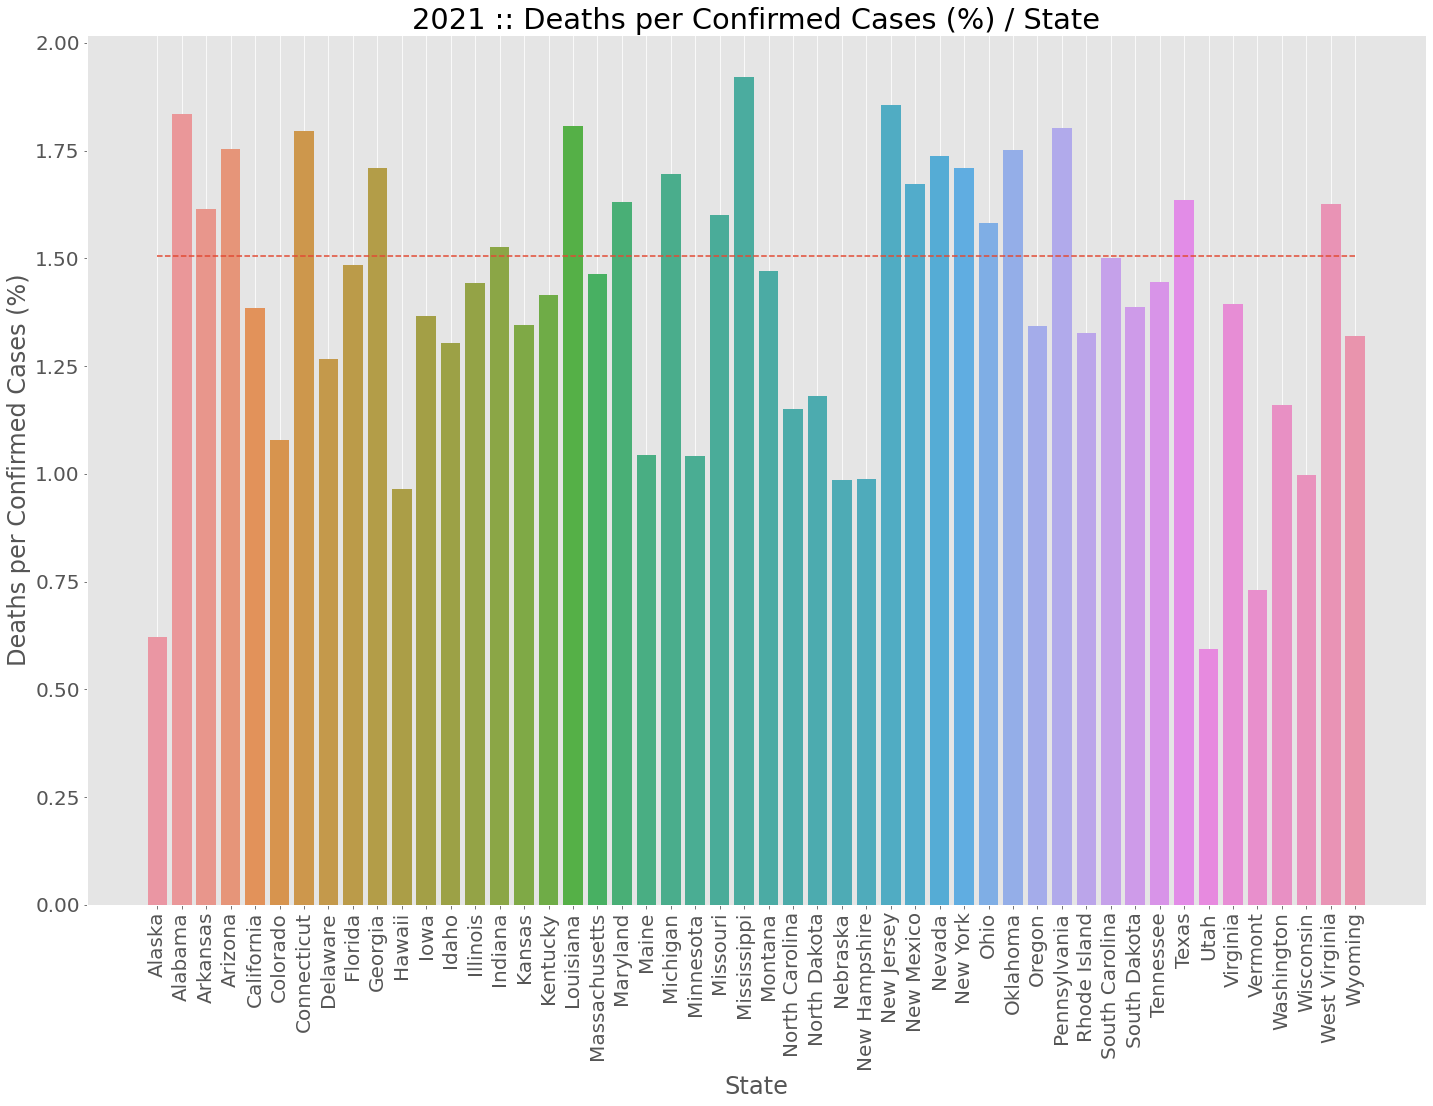

In [16]:
plt.figure(figsize=(24,16))

mean_deaths_per_cases = (merged_2021_df["ConfirmedDeaths"].sum() / merged_2021_df["ConfirmedCases"].sum()) * 100
print (f"National average of deaths per confirmed cases (%) in 2021: {mean_deaths_per_cases}.")

# Creating the plot using Matplotlib's pyplot methods
sns.barplot(x=merged_2021_df["RegionName"], y=merged_2021_df["Deaths per Confirmed Cases (%)"])
plt.title("2021 :: Deaths per Confirmed Cases (%) / State")
plt.xlabel("State")
plt.ylabel("Deaths per Confirmed Cases (%)")
plt.xticks(rotation="vertical")
plt.grid()
plt.plot(merged_2021_df["RegionName"], pd.Series(mean_deaths_per_cases, index=range(len(merged_2021_df))),linestyle="--")
plt.savefig(fname="./images/2021 - Deaths Per Confirmed Cases.png")

In [17]:
summary_2021_df = merged_2021_df[["RegionName", "ConfirmedCases", "ConfirmedDeaths"]]
summary_2021_df = summary_2021_df.set_index(["RegionName"])
summary_2021_df

ConfirmedCases  ConfirmedDeaths
RegionName                                     
Alaska                  157169              978
Alabama                 896614            16455
Arkansas                566486             9148
Arizona                1381488            24229
California             5517870            76478
Colorado               1001343            10806
Connecticut             510188             9160
Delaware                180366             2286
Florida                4209927            62504
Georgia                1839879            31443
Hawaii                  112932             1090
Iowa                    575501             7858
Idaho                   319382             4162
Illinois               2149574            31017
Indiana                1246854            19037
Kansas                  520388             7006
Kentucky                856145            12118
Louisiana               828695            14986
Massachusetts          1140614            16706
Maryland                720814            11758
Maine                   146736             1531
Michigan               1710325            29020
Minnesota              1022212            10656
Missouri               1013458            16227
Mississippi             543737            10450
Montana                 197724             2906
North Carolina         1686667            19426
North Dakota            174319             2057
Nebraska                338257             3338
New Hampshire           198667             1961
New Jersey             1564253            29037
New Mexico              350043             5855
Nevada                  484641             8419
New York               3480280            59508
Ohio                   2016082            31897
Oklahoma                708938            12419
Oregon                  421263             5655
Pennsylvania           2036424            36705
Rhode Island            231096             3066
South Carolina          975320            14636
South Dakota            179204             2486
Tennessee              1436263            20762
Texas                  4630880            75744
Utah                    636992             3787
Virginia               1118518            15587
Vermont                  64447              471
Washington              849075             9853
Wisconsin              1120663            11173
West Virginia           328162             5336
Wyoming                 115638             1526

In [18]:
fig = summary_2021_df.plot.bar(title='Confirmed Cases and Deaths per State (2021)')
fig.update_layout(title_x=0.5)
# TO-DO: How to save this interactive file ?

## Concatenating 2020 & 2021 Data - National Data

In [19]:
national_data_2020_df = oxford_data_master_2020_df.loc[oxford_data_master_2020_df["RegionName"].isna(),:].copy()
national_data_2021_df = oxford_data_master_2021_df.loc[oxford_data_master_2021_df["RegionName"].isna(),:].copy()

# Create a copy of the initial DataFrame (2020 & 2021) - National Data
oxford_data_master_2020_df = national_data_2020_df.copy()
oxford_data_master_2021_df = national_data_2021_df.copy()

# Data Frame initialised only with the required columns
oxford_data_master_2020_df = oxford_data_master_2020_df[["RegionName","Date","ConfirmedCases","ConfirmedDeaths","PopulationVaccinated","GovernmentResponseIndex_SimpleAverage"]]
oxford_data_master_2021_df = oxford_data_master_2021_df[["RegionName","Date","ConfirmedCases","ConfirmedDeaths","PopulationVaccinated","GovernmentResponseIndex_SimpleAverage"]]

# Concatenating dataframes (2020 and 2021)
oxford_data_master_2020_2021_df = pd.concat([oxford_data_master_2020_df, oxford_data_master_2021_df])

# Filtering to get the national information from the database ('RegionName' is empty)
oxford_data_master_2020_2021_df = oxford_data_master_2020_2021_df.loc[oxford_data_master_2020_2021_df["RegionName"].isna(),:]

# Data Frame initialised only with the required columns
oxford_data_master_2020_2021_df = oxford_data_master_2020_2021_df.reset_index()
oxford_data_master_2020_2021_df = oxford_data_master_2020_2021_df[["Date","ConfirmedCases","ConfirmedDeaths","PopulationVaccinated","GovernmentResponseIndex_SimpleAverage"]]

# Updating NaN fields with 0 (zero)
oxford_data_master_2020_2021_df = oxford_data_master_2020_2021_df.fillna(0)

# Calculating new columns of the Data Frame
oxford_data_master_2020_2021_df["PopulationVaccinated (%)"] = oxford_data_master_2020_2021_df["PopulationVaccinated"]
oxford_data_master_2020_2021_df["PopulationVaccinated"] = oxford_data_master_2020_2021_df["PopulationVaccinated"] / 100 * usa_population
oxford_data_master_2020_2021_df["PopulationVaccinated"] = oxford_data_master_2020_2021_df["PopulationVaccinated"].astype(int)

oxford_data_master_2020_2021_df["Ratio Deaths per Cases (%)"] = oxford_data_master_2020_2021_df["ConfirmedDeaths"] / oxford_data_master_2020_2021_df["ConfirmedCases"] * 100
oxford_data_master_2020_2021_df["Ratio Deaths per Vaccinated (%)"] = oxford_data_master_2020_2021_df["ConfirmedDeaths"] / oxford_data_master_2020_2021_df["PopulationVaccinated"] * 100
oxford_data_master_2020_2021_df["ConfirmedCases (%)"] = oxford_data_master_2020_2021_df["ConfirmedCases"] / usa_population * 100
oxford_data_master_2020_2021_df["ConfirmedDeaths (%)"] = oxford_data_master_2020_2021_df["ConfirmedDeaths"] / usa_population * 100

oxford_data_master_2020_2021_df

Date  ConfirmedCases  ConfirmedDeaths  PopulationVaccinated  \
0   2020-01-01             0.0              0.0                     0   
1   2020-01-02             0.0              0.0                     0   
2   2020-01-03             0.0              0.0                     0   
3   2020-01-04             0.0              0.0                     0   
4   2020-01-05             0.0              0.0                     0   
..         ...             ...              ...                   ...   
726 2021-12-27      52918601.0         818730.0             207393928   
727 2021-12-28      53291067.0         821022.0             207624806   
728 2021-12-29      53802655.0         823390.0             207855683   
729 2021-12-30      54400342.0         824880.0             208086560   
730 2021-12-31      54912198.0         825610.0             208185508   

     GovernmentResponseIndex_SimpleAverage  PopulationVaccinated (%)  \
0                                     0.00                      0.00   
1                                     0.00                      0.00   
2                                     0.00                      0.00   
3                                     0.00                      0.00   
4                                     0.00                      0.00   
..                                     ...                       ...   
726                                  27.86                     62.88   
727                                  27.86                     62.95   
728                                  27.86                     63.02   
729                                  27.86                     63.09   
730                                  26.31                     63.12   

     Ratio Deaths per Cases (%)  Ratio Deaths per Vaccinated (%)  \
0                           NaN                              NaN   
1                           NaN                              NaN   
2                           NaN                              NaN   
3                           NaN                              NaN   
4                           NaN                              NaN   
..                          ...                              ...   
726                    1.547150                         0.394770   
727                    1.540637                         0.395435   
728                    1.530389                         0.396135   
729                    1.516314                         0.396412   
730                    1.503509                         0.396574   

     ConfirmedCases (%)  ConfirmedDeaths (%)  
0              0.000000             0.000000  
1              0.000000             0.000000  
2              0.000000             0.000000  
3              0.000000             0.000000  
4              0.000000             0.000000  
..                  ...                  ...  
726           16.044451             0.248232  
727           16.157379             0.248927  
728           16.312488             0.249645  
729           16.493701             0.250096  
730           16.648891             0.250318  

[731 rows x 10 columns]

## Confirmed Cases vs. Population Vaccinated
* USA National Data
* Comparison between Jan-2020 to Dec-2021

In [20]:
# Create a copy of the DataFrame
vaccination_cleanUSA_df = oxford_data_master_2020_2021_df.copy()

# Data Frame initialised only with the required columns
vaccination_cleanUSA_df = vaccination_cleanUSA_df[["Date","ConfirmedCases","ConfirmedDeaths","PopulationVaccinated","PopulationVaccinated (%)","ConfirmedCases (%)","Ratio Deaths per Cases (%)"]]

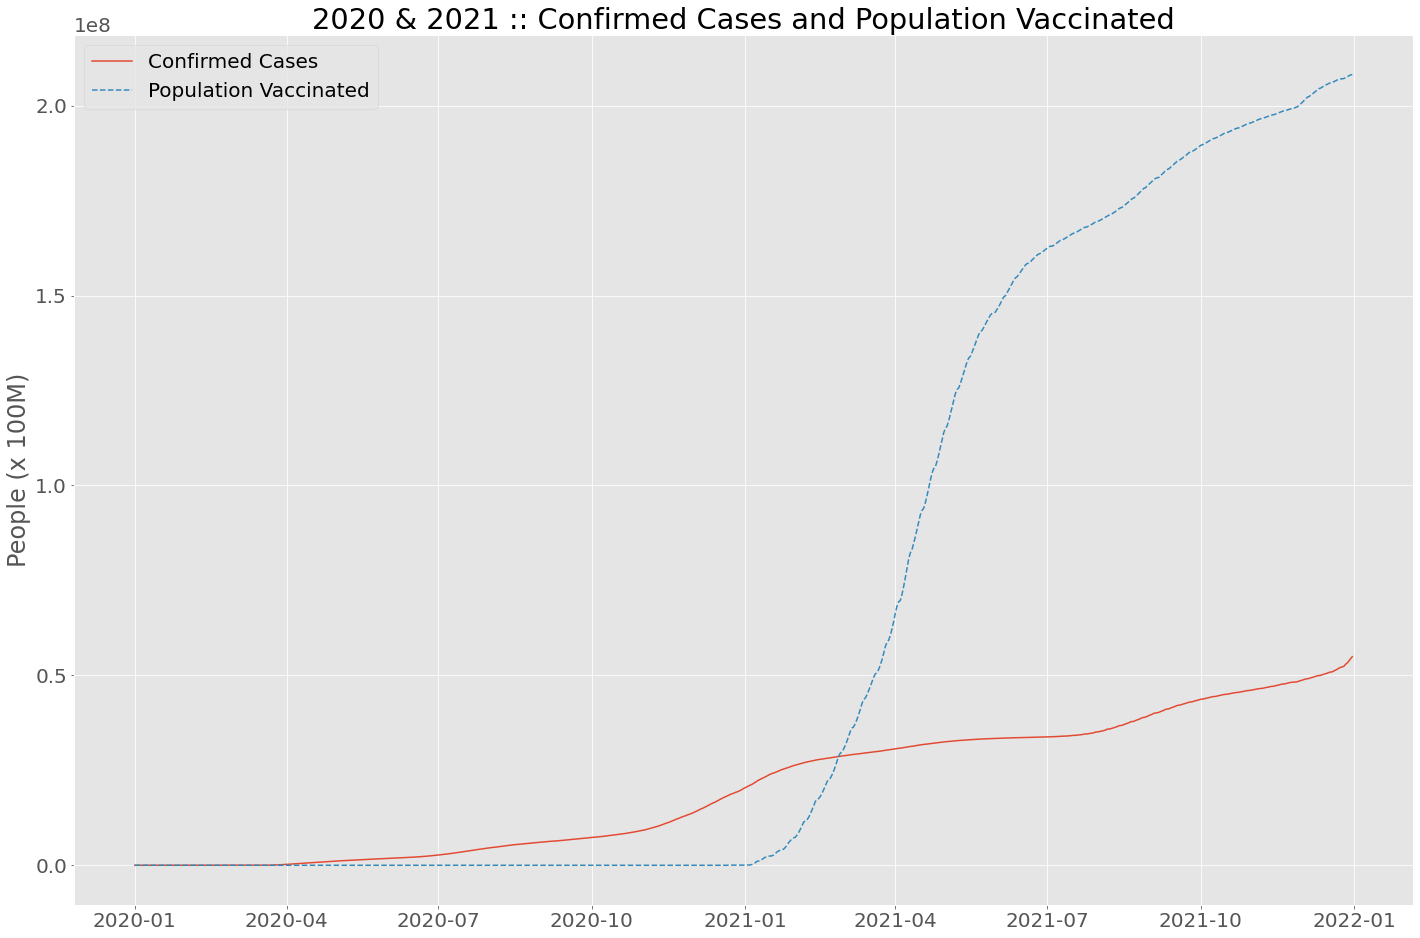

In [21]:
# Plot the progress of Confirmed Cases and the Population being vaccinated over the year beteween Jan 2020 and Dec 2020
plt.figure(figsize=(24,16))

plt.plot(vaccination_cleanUSA_df["Date"], vaccination_cleanUSA_df["ConfirmedCases"], label="Confirmed Cases", linestyle="-")
plt.plot(vaccination_cleanUSA_df["Date"], vaccination_cleanUSA_df["PopulationVaccinated"], label="Population Vaccinated", linestyle="--")
plt.title("2020 & 2021 :: Confirmed Cases and Population Vaccinated")
plt.ylabel("People (x 100M)")
plt.legend()
plt.savefig(fname="./images/2020-2021 - Deaths and Vaccinated and Confirmed Cases (People).png")

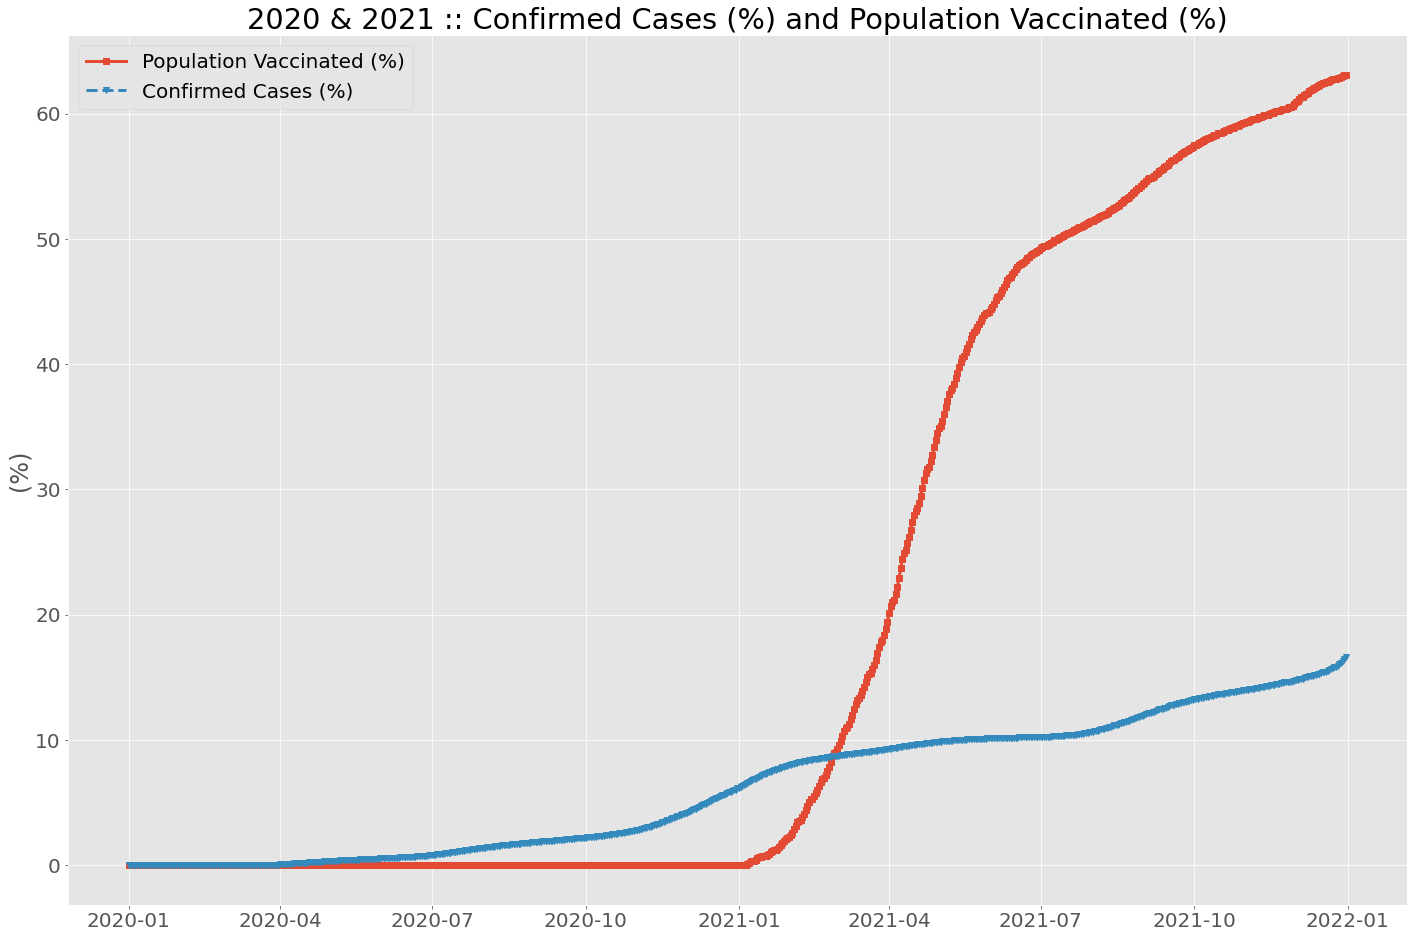

In [22]:
# Plot the progress of Confirmed Cases and the Population being vaccinated over the year beteween Jan 2020 and Dec 2020
plt.figure(figsize=(24,16))

plt.plot(vaccination_cleanUSA_df["Date"], vaccination_cleanUSA_df["PopulationVaccinated (%)"], 's', label="Population Vaccinated (%)", linestyle="-", linewidth=3)
plt.plot(vaccination_cleanUSA_df["Date"], vaccination_cleanUSA_df["ConfirmedCases (%)"], 'v', label="Confirmed Cases (%)", linestyle="--", linewidth=3)
plt.title("2020 & 2021 :: Confirmed Cases (%) and Population Vaccinated (%)")
plt.ylabel("(%)")
plt.legend()
plt.savefig(fname="./images/2020-2021 - Confirmed Cases Ratio and Population Vaccinated (Percentage).png")

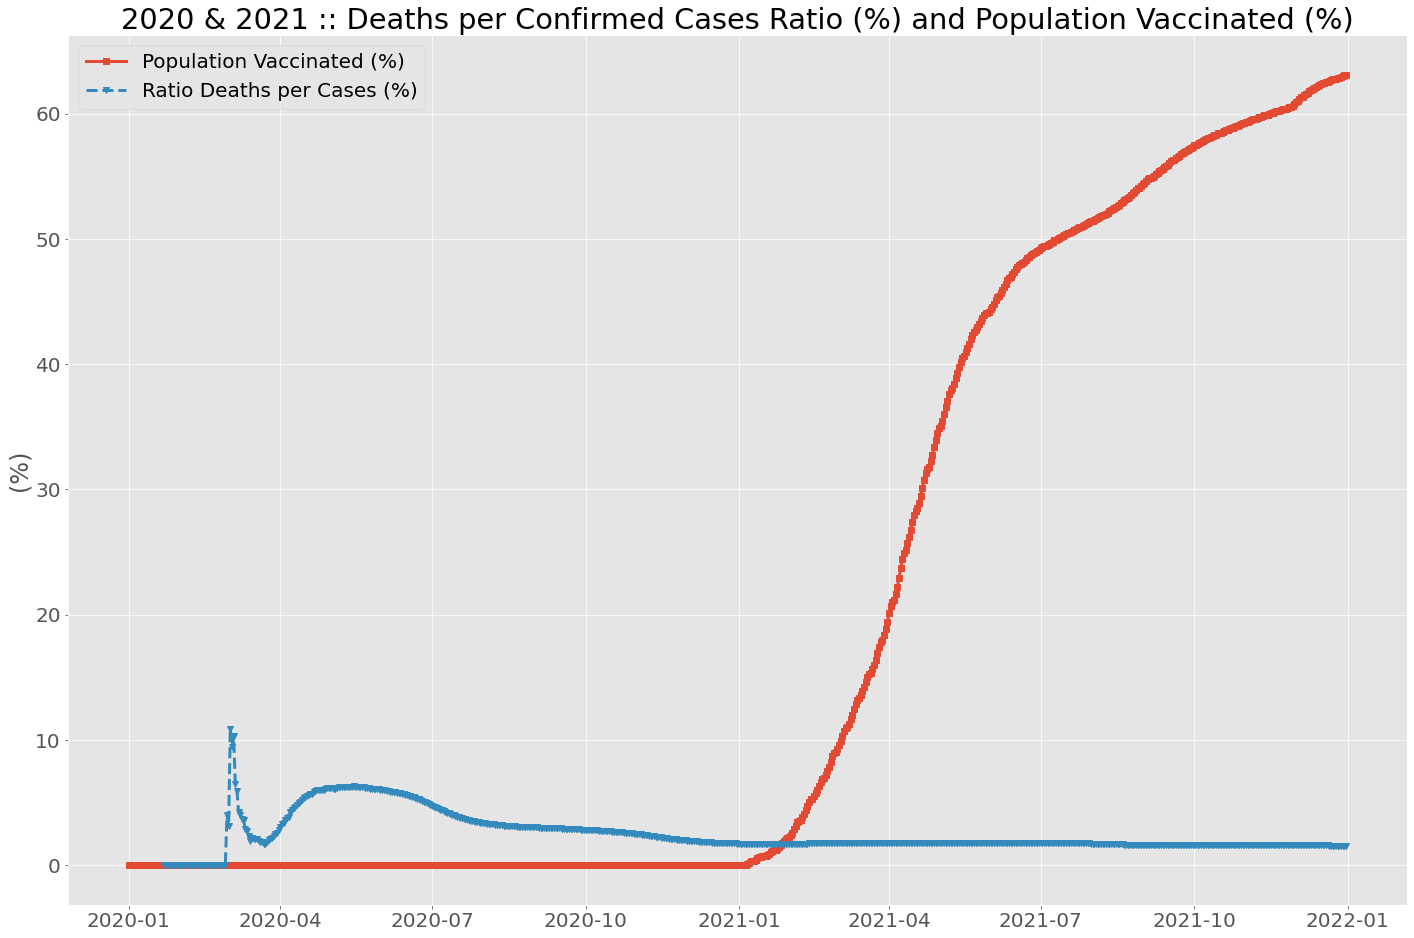

In [23]:
# Plot the progress of Confirmed Cases and the Population being vaccinated over the year beteween Jan 2020 and Dec 2020
plt.figure(figsize=(24,16))

plt.plot(vaccination_cleanUSA_df["Date"], vaccination_cleanUSA_df["PopulationVaccinated (%)"], 's', label="Population Vaccinated (%)", linestyle="-", linewidth=3)
plt.plot(vaccination_cleanUSA_df["Date"], vaccination_cleanUSA_df["Ratio Deaths per Cases (%)"], 'v', label="Ratio Deaths per Cases (%)", linestyle="--", linewidth=3)
plt.title("2020 & 2021 :: Deaths per Confirmed Cases Ratio (%) and Population Vaccinated (%)")
plt.ylabel("(%)")
plt.legend()
plt.savefig(fname="./images/2020-2021 - Deaths per Confirmed Cases Ratio and Population Vaccinated (Percentage).png")

In [24]:
vaccination_cleanUSA_df

Date  ConfirmedCases  ConfirmedDeaths  PopulationVaccinated  \
0   2020-01-01             0.0              0.0                     0   
1   2020-01-02             0.0              0.0                     0   
2   2020-01-03             0.0              0.0                     0   
3   2020-01-04             0.0              0.0                     0   
4   2020-01-05             0.0              0.0                     0   
..         ...             ...              ...                   ...   
726 2021-12-27      52918601.0         818730.0             207393928   
727 2021-12-28      53291067.0         821022.0             207624806   
728 2021-12-29      53802655.0         823390.0             207855683   
729 2021-12-30      54400342.0         824880.0             208086560   
730 2021-12-31      54912198.0         825610.0             208185508   

     PopulationVaccinated (%)  ConfirmedCases (%)  Ratio Deaths per Cases (%)  
0                        0.00            0.000000                         NaN  
1                        0.00            0.000000                         NaN  
2                        0.00            0.000000                         NaN  
3                        0.00            0.000000                         NaN  
4                        0.00            0.000000                         NaN  
..                        ...                 ...                         ...  
726                     62.88           16.044451                    1.547150  
727                     62.95           16.157379                    1.540637  
728                     63.02           16.312488                    1.530389  
729                     63.09           16.493701                    1.516314  
730                     63.12           16.648891                    1.503509  

[731 rows x 7 columns]

## Deaths per Confirmed Cases Ratio (2020-2021)

In [25]:
# Create a copy of the DataFrame
vaccination_cleanUSA_df = oxford_data_master_2020_2021_df.copy()

# Identifying the highest death per confirmed case ratio, and which date it was
highest_death_per_case_ratio = vaccination_cleanUSA_df["Ratio Deaths per Cases (%)"].max()
date_highest_death_per_case_ratio = (vaccination_cleanUSA_df.loc[vaccination_cleanUSA_df["Ratio Deaths per Cases (%)"] == highest_death_per_case_ratio])["Date"]

# Identifying the lowest death per confirmed case ratio, and which date it was
lowest_death_per_case_ratio = vaccination_cleanUSA_df["Ratio Deaths per Cases (%)"].min()
date_lowest_death_per_case_ratio = (vaccination_cleanUSA_df.loc[vaccination_cleanUSA_df["Ratio Deaths per Cases (%)"] == lowest_death_per_case_ratio])["Date"]

# Printing the information for further analysis
print(f"Date with the highest deaths per cases ratio: ({highest_death_per_case_ratio}) - {date_highest_death_per_case_ratio}")
print(f"Date with the lowest deaths per cases ratio: ({lowest_death_per_case_ratio}) - {date_lowest_death_per_case_ratio}")
print(f"Impact of deaths per cases after vaccination started (2021): {(1-(lowest_death_per_case_ratio/highest_death_per_case_ratio))*100} %")

# Plottin the Data Frame
fig = vaccination_cleanUSA_df.plot(x='Date', y=['Ratio Deaths per Cases (%)'], title="2020-2021 :: Deaths per Confirmed Cases Ratio (%)")
fig.update_layout(title_x=0.5)
# TO-DO: How to save this interactive file ?

Date with the highest deaths per cases ratio: (10.909090909090908) - 61   2020-03-02
Name: Date, dtype: datetime64[ns]
Date with the lowest deaths per cases ratio: (0.0) - 21   2020-01-22
22   2020-01-23
23   2020-01-24
24   2020-01-25
25   2020-01-26
26   2020-01-27
27   2020-01-28
28   2020-01-29
29   2020-01-30
30   2020-01-31
31   2020-02-01
32   2020-02-02
33   2020-02-03
34   2020-02-04
35   2020-02-05
36   2020-02-06
37   2020-02-07
38   2020-02-08
39   2020-02-09
40   2020-02-10
41   2020-02-11
42   2020-02-12
43   2020-02-13
44   2020-02-14
45   2020-02-15
46   2020-02-16
47   2020-02-17
48   2020-02-18
49   2020-02-19
50   2020-02-20
51   2020-02-21
52   2020-02-22
53   2020-02-23
54   2020-02-24
55   2020-02-25
56   2020-02-26
57   2020-02-27
58   2020-02-28
Name: Date, dtype: datetime64[ns]
Impact of deaths per cases after vaccination started (2021): 100.0 %


## Deaths per Confirmed Cases Ratio (2021) 

In [26]:
# Create a copy of the DataFrame
vaccination_cleanUSA_2021_df = oxford_data_master_2021_df.copy()

# Updating NaN fields with 0 (zero)
vaccination_cleanUSA_2021_df = vaccination_cleanUSA_2021_df.fillna(0)

# Calculating new columns of the Data Frame
vaccination_cleanUSA_2021_df["Ratio Deaths per Cases (%)"] = vaccination_cleanUSA_2021_df["ConfirmedDeaths"] / vaccination_cleanUSA_2021_df["ConfirmedCases"] * 100
vaccination_cleanUSA_2021_df["Ratio Deaths per Vaccinated (%)"] = vaccination_cleanUSA_2021_df["ConfirmedDeaths"] / vaccination_cleanUSA_2021_df["PopulationVaccinated"] * 100

# Identifying the highest death per confirmed case ratio, and which date it was
highest_death_per_case_ratio = vaccination_cleanUSA_2021_df["Ratio Deaths per Cases (%)"].max()
date_highest_death_per_case_ratio = (vaccination_cleanUSA_2021_df.loc[vaccination_cleanUSA_2021_df["Ratio Deaths per Cases (%)"] == highest_death_per_case_ratio])["Date"]

# Identifying the lowest death per confirmed case ratio, and which date it was
lowest_death_per_case_ratio = vaccination_cleanUSA_2021_df["Ratio Deaths per Cases (%)"].min()
date_lowest_death_per_case_ratio = (vaccination_cleanUSA_2021_df.loc[vaccination_cleanUSA_2021_df["Ratio Deaths per Cases (%)"] == lowest_death_per_case_ratio])["Date"]

# Printing the information for further analysis
print(f"Date with the highest deaths per cases ratio: ({highest_death_per_case_ratio}) - {date_highest_death_per_case_ratio}")
print(f"Date with the lowest deaths per cases ratio: ({lowest_death_per_case_ratio}) - {date_lowest_death_per_case_ratio}")
print(f"Impact of deaths per cases after vaccination started (2021): {(1-(lowest_death_per_case_ratio/highest_death_per_case_ratio))*100} %")

# Plottin the Data Frame
fig = vaccination_cleanUSA_2021_df.plot(x='Date', y=['Ratio Deaths per Cases (%)'], title="2021 :: Deaths per Confirmed Cases Ratio (%)")
fig.update_layout(title_x=0.5)
# TO-DO: How to save this interactive file ?

Date with the highest deaths per cases ratio: (1.8013734418754743) - 76   2021-03-18
Name: Date, dtype: datetime64[ns]
Date with the lowest deaths per cases ratio: (1.503509293144667) - 364   2021-12-31
Name: Date, dtype: datetime64[ns]
Impact of deaths per cases after vaccination started (2021): 16.535391374522 %


In [27]:
fig = vaccination_cleanUSA_2021_df.plot(x='Date', y=['Ratio Deaths per Vaccinated (%)'], title="2021 :: Deaths per Vaccinated Population Ratio (%)")
fig.update_layout(title_x=0.5)
# TO-DO: How to save this interactive file ?

# Government Response

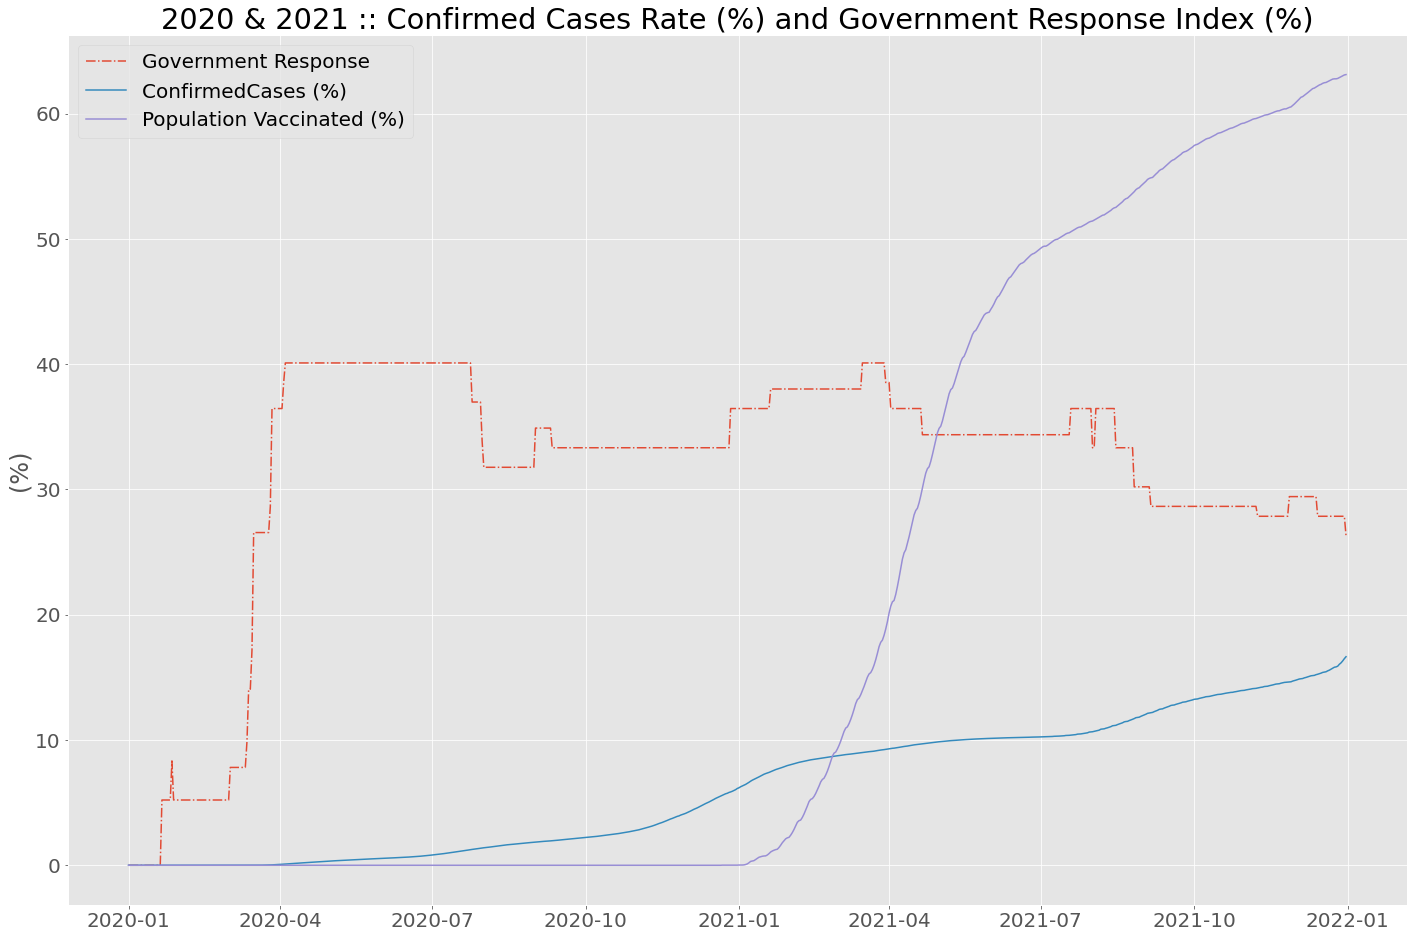

In [28]:
plt.figure(figsize=(24,16))

plt.plot(vaccination_cleanUSA_df["Date"], vaccination_cleanUSA_df["GovernmentResponseIndex_SimpleAverage"], label = "Government Response", linestyle="-.")
plt.plot(vaccination_cleanUSA_df["Date"], vaccination_cleanUSA_df["ConfirmedCases (%)"], label = "ConfirmedCases (%)", linestyle='-')
plt.plot(vaccination_cleanUSA_df["Date"], vaccination_cleanUSA_df["PopulationVaccinated (%)"], label = "Population Vaccinated (%)", linestyle='-')
plt.title("2020 & 2021 :: Confirmed Cases Rate (%) and Government Response Index (%)")
plt.ylabel("(%)")
plt.legend()
plt.savefig(fname="./images/2020-2021 - Confirmed Cases Rate and Government Response Index (Percentage).png")

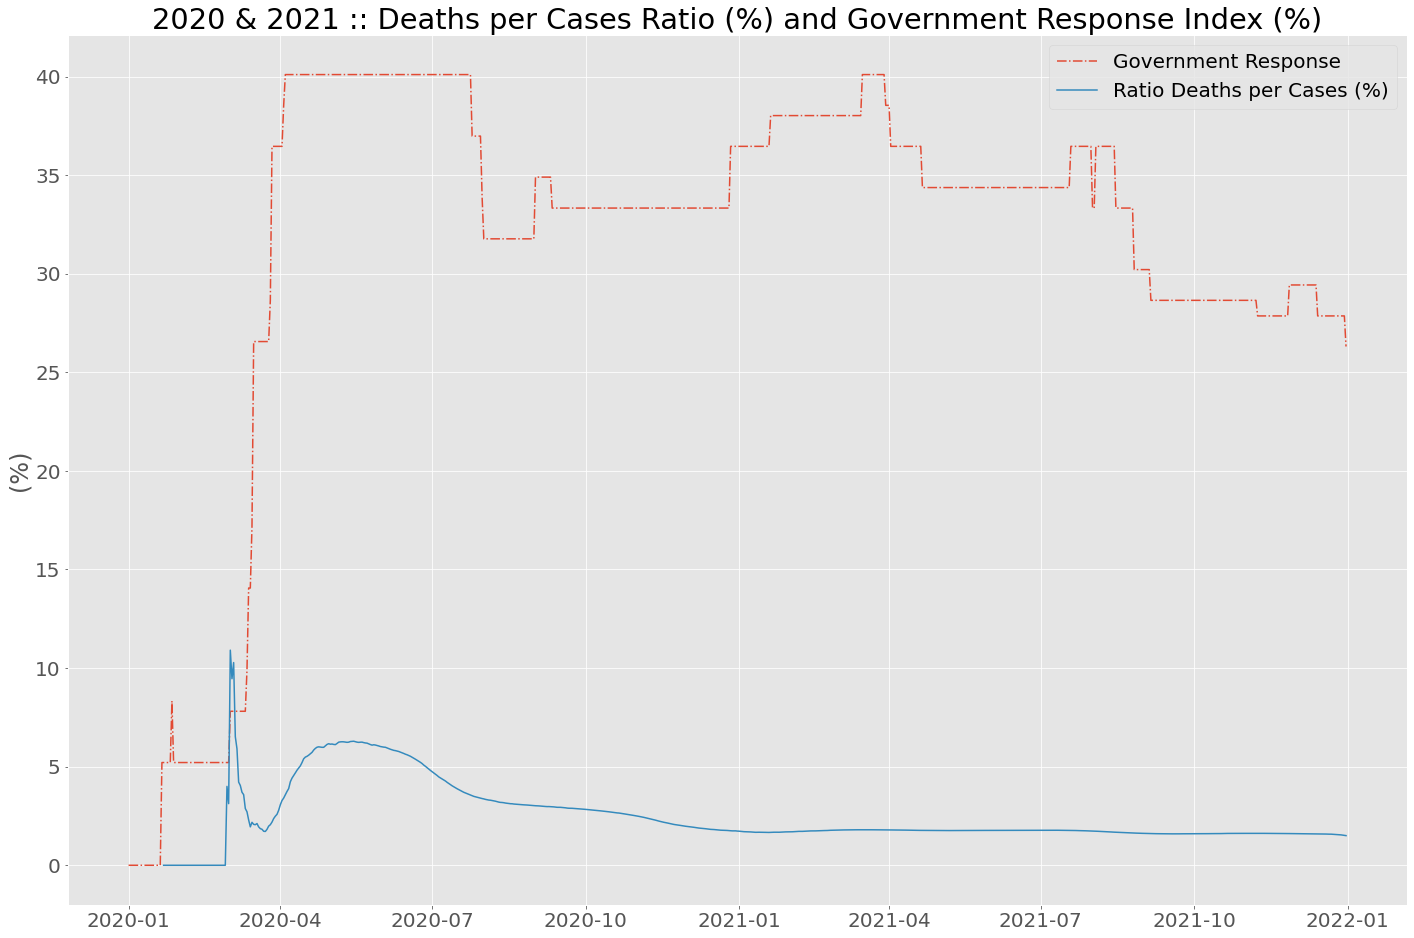

In [29]:
# Calculating new columns of the Data Frame
vaccination_cleanUSA_df["Deaths per 1k confirmed cases"] = vaccination_cleanUSA_df["ConfirmedDeaths"] / vaccination_cleanUSA_df["ConfirmedCases"] * 1000

plt.figure(figsize=(24,16))

plt.plot(vaccination_cleanUSA_df["Date"], vaccination_cleanUSA_df["GovernmentResponseIndex_SimpleAverage"], label = "Government Response", linestyle="-.")
plt.plot(vaccination_cleanUSA_df["Date"], vaccination_cleanUSA_df["Ratio Deaths per Cases (%)"], label = "Ratio Deaths per Cases (%)", linestyle='-')
plt.title("2020 & 2021 :: Deaths per Cases Ratio (%) and Government Response Index (%)")
plt.ylabel("(%)")
plt.legend()
plt.savefig(fname="./images/2020-2021 - Deaths per Cases Ratio and Government Response Index (Percentage).png")